# Live Movie Ratings -- from Tweets
 https://github.com/sidooms/MovieTweetings

## Get up-to-date Movie Ratings

These ratings are updated automatically online by a process scanning current Tweets;
see the <a href="https://github.com/sidooms/MovieTweetings">Movie Tweetings</a> project page.
The information in the tweets has been digested into three tables -- about movies, users, and ratings.
Up-to-date snapshots and archives are provided.

In [1]:
URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat"

Ratings = read.table( URL, sep = ":", header=FALSE )[,c(1,3,5,7)]
colnames(Ratings) = c("UserID", "MovieID", "Rating", "TwitterID")

head(Ratings)

UserID,MovieID,Rating,TwitterID
1,68646,10,1381620027
1,113277,10,1379466669
2,422720,8,1412178746
2,454876,8,1394818630
2,790636,7,1389963947
2,816711,8,1379963769


#  Some analysis of ratings

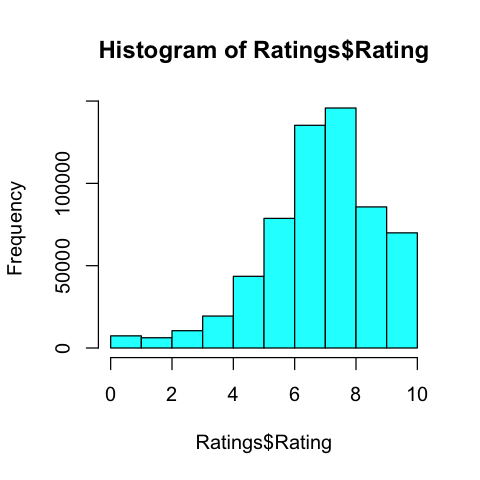

In [2]:
# Example:  Histogram of Rating values

options( repr.plot.width=4, repr.plot.height=4 ) # control plot dimensions

h = hist( Ratings$Rating, breaks = 0:10, col="cyan" )  # compute and plot the histogram

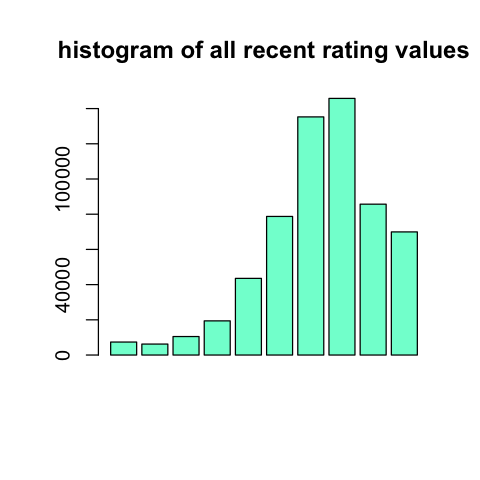

In [3]:
barplot( h$counts, col="aquamarine", main="histogram of all recent rating values" )

In [4]:
# Another more general way of counting:  table()

CountOfRatings = as.data.frame(table( Ratings$Rating, dnn="rating" ), responseName="count")
CountOfRatings

rating,count
0,144
1,7234
2,6229
3,10508
4,19406
5,43547
6,78732
7,135272
8,145782
9,85697


In [5]:
# Summary statistics

summary( Ratings$Rating )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   6.000   8.000   7.308   9.000  10.000 

## Load the fitdistr() function

In [6]:
not.installed = function(package_name)  !is.element(package_name, installed.packages()[,1])
if (not.installed("MASS")) install.packages("MASS")

library(MASS)

# example(fitdistr)  #  see some examples of how to use the fitdistr() function

# Problem 1: Derive a distribution (pdf) for all Rating values

In [7]:
# Find a distribution (pdf) that describes, as well as possible,
# the distribution of all Rating values

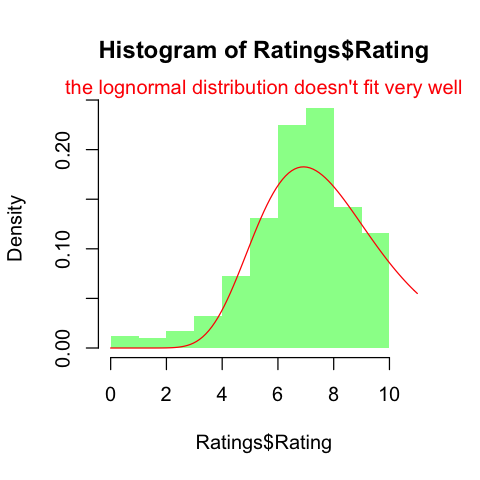

In [8]:
hist( Ratings$Rating, probability=TRUE, border=NA, col="palegreen", breaks=0:11 )

MLEparameters = fitdistr( Ratings$Rating+1, "lognormal" )

curve( dlnorm(x+0.5, meanlog=MLEparameters$estimate[1], sdlog=MLEparameters$estimate[2]), col="red", add=TRUE )  # doesn't fit very well

mtext( "the lognormal distribution doesn't fit very well", side=3, col="red" )

# Problem 2: Derive a distribution (pdf) for: Ratings per User

In [9]:
# Find a distribution (pdf) that describes, as well as possible:
#   { (the number of Ratings per UserID)  | for each User that has made 3 or more Ratings  }

# Problem 3: Derive a distribution (pdf) for: Ratings per Movie

In [10]:
# Find a distribution (pdf) that describes, as well as possible:
#   { (the number of Ratings per MovieID) | for each Movie that has 10 or more Ratings }

# Analysis of other data

## Get the Movie name and genre information for the Ratings above

In [13]:
URL = "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat"
MovieText = readLines( URL )

Movies = matrix( sapply( MovieInformation,
                        function(x) unlist(strsplit(sub(" [(]([0-9]+)[)]", "::\\1",x),"::"))[1:4] ),
                            nrow=length(MovieInformation), ncol=4, byrow=TRUE)
colnames(Movies) = c("MovieID", "MovieTitle", "Year", "Genres")

head(Movies)

MovieID,MovieTitle,Year,Genres
0000008,Edison Kinetoscopic Record of a Sneeze,1894,Documentary|Short
0000010,La sortie des usines Lumire,1895,Documentary|Short
0000012,The Arrival of a Train,1896,Documentary|Short
25,The Oxford and Cambridge University Boat Race,1895,NA
0000091,Le manoir du diable,1896,Short|Horror
0000417,Le voyage dans la lune,1902,Short|Adventure|Fantasy


## Analyze which Genres are covered by these movies

In [14]:
Genres = sort( unique(unlist(strsplit(Movies[,4], "[|]"))) )
Genres


[1] "Action"      "Adult"       "Adventure"   "Animation"   "Biography"  
 [6] "Comedy"      "Crime"       "Documentary" "Drama"       "Family"     
[11] "Fantasy"     "Film-Noir"   "Game-Show"   "History"     "Horror"     
[16] "Music"       "Musical"     "Mystery"     "News"        "Reality-TV" 
[21] "Romance"     "Sci-Fi"      "Short"       "Sport"       "Talk-Show"  
[26] "Thriller"    "War"         "Western"

In [15]:
GenreCounts = sort( table( c(unlist(strsplit(Movies[,4], "[|]"))) ), decreasing=TRUE )
GenreCounts


      Drama      Comedy    Thriller      Action     Romance       Crime 
      13640        8639        4013        3992        3930        3617 
     Horror Documentary   Adventure     Mystery      Sci-Fi   Biography 
       3249        2430        2344        1644        1388        1262 
    Fantasy      Family       Short   Animation     History       Music 
       1231        1180        1086         942         830         795 
        War     Musical       Sport     Western   Film-Noir        News 
        648         538         518         320         212          70 
      Adult  Reality-TV   Talk-Show   Game-Show 
          8           8           2           1 

In [16]:
# The result above is a table with row names

rownames(GenreCounts)

[1] "Drama"       "Comedy"      "Thriller"    "Action"      "Romance"    
 [6] "Crime"       "Horror"      "Documentary" "Adventure"   "Mystery"    
[11] "Sci-Fi"      "Biography"   "Fantasy"     "Family"      "Short"      
[16] "Animation"   "History"     "Music"       "War"         "Musical"    
[21] "Sport"       "Western"     "Film-Noir"   "News"        "Adult"      
[26] "Reality-TV"  "Talk-Show"   "Game-Show"

## Join the Ratings and Movie tables

In [17]:
Ratings_and_Movies = merge( Ratings, Movies, by="MovieID" )

head(Ratings_and_Movies)

MovieID,UserID,Rating,TwitterID,MovieTitle,Year,Genres
25,27909,8,1488189899,The Oxford and Cambridge University Boat Race,1895,NA
45136,7979,10,1474694931,Semmelweis,1952,NA
210156,7979,10,1474858103,The Lion's Den,1998,NA
210156,30275,10,1474858454,The Lion's Den,1998,NA
210924,15631,7,1405185743,The Promise,1997,NA
311095,7979,9,1470997284,Everyone's a Customer,2001,NA


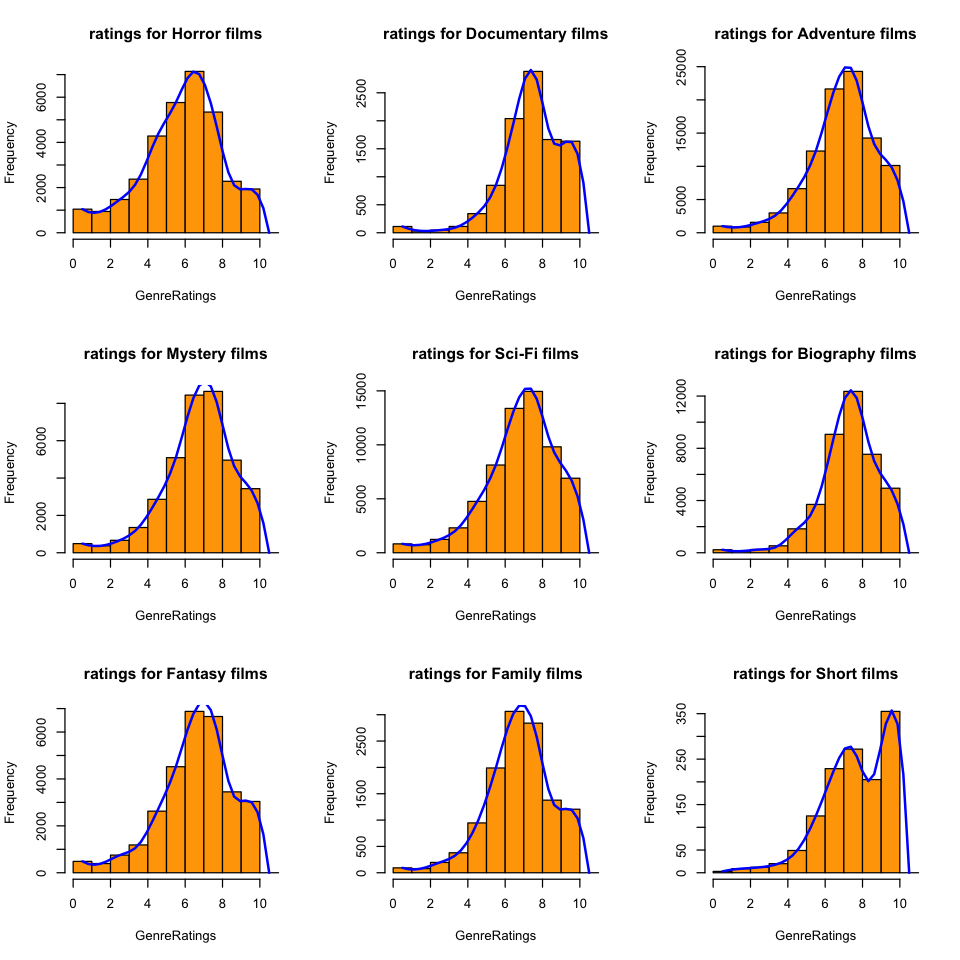

In [19]:
options( repr.plot.width=8, repr.plot.height=8 )
opar = par(mfrow=c(3,3))  #  generate a 3 x 3 array of plots

for (g in rownames(GenreCounts)[7:15]) {  # look at less-popular Genre Types
    GenreRatings = subset( Ratings_and_Movies$Rating, grepl( g, Ratings_and_Movies$Genres ) )
    h = hist(GenreRatings, breaks=0:11, main=paste("ratings for",g,"films"), col="orange")
    points(spline((0.5:10.5),h$counts), type="l", col="blue", lwd=2 )
}

par(opar)

In [ ]:
## There is also TwitterID information about Users, but we ignore it.
# Users   = read.table( "https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/users.dat",
#                       sep = ":", header=FALSE )[,c(1,3)]
# colnames(Users) = c("UserID", "TwitterID")